In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
print("Percentage of Null values in each column: ")
display((df.isnull().sum()/len(df))*100)

Percentage of Null values in each column: 


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
print(df.nunique())

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


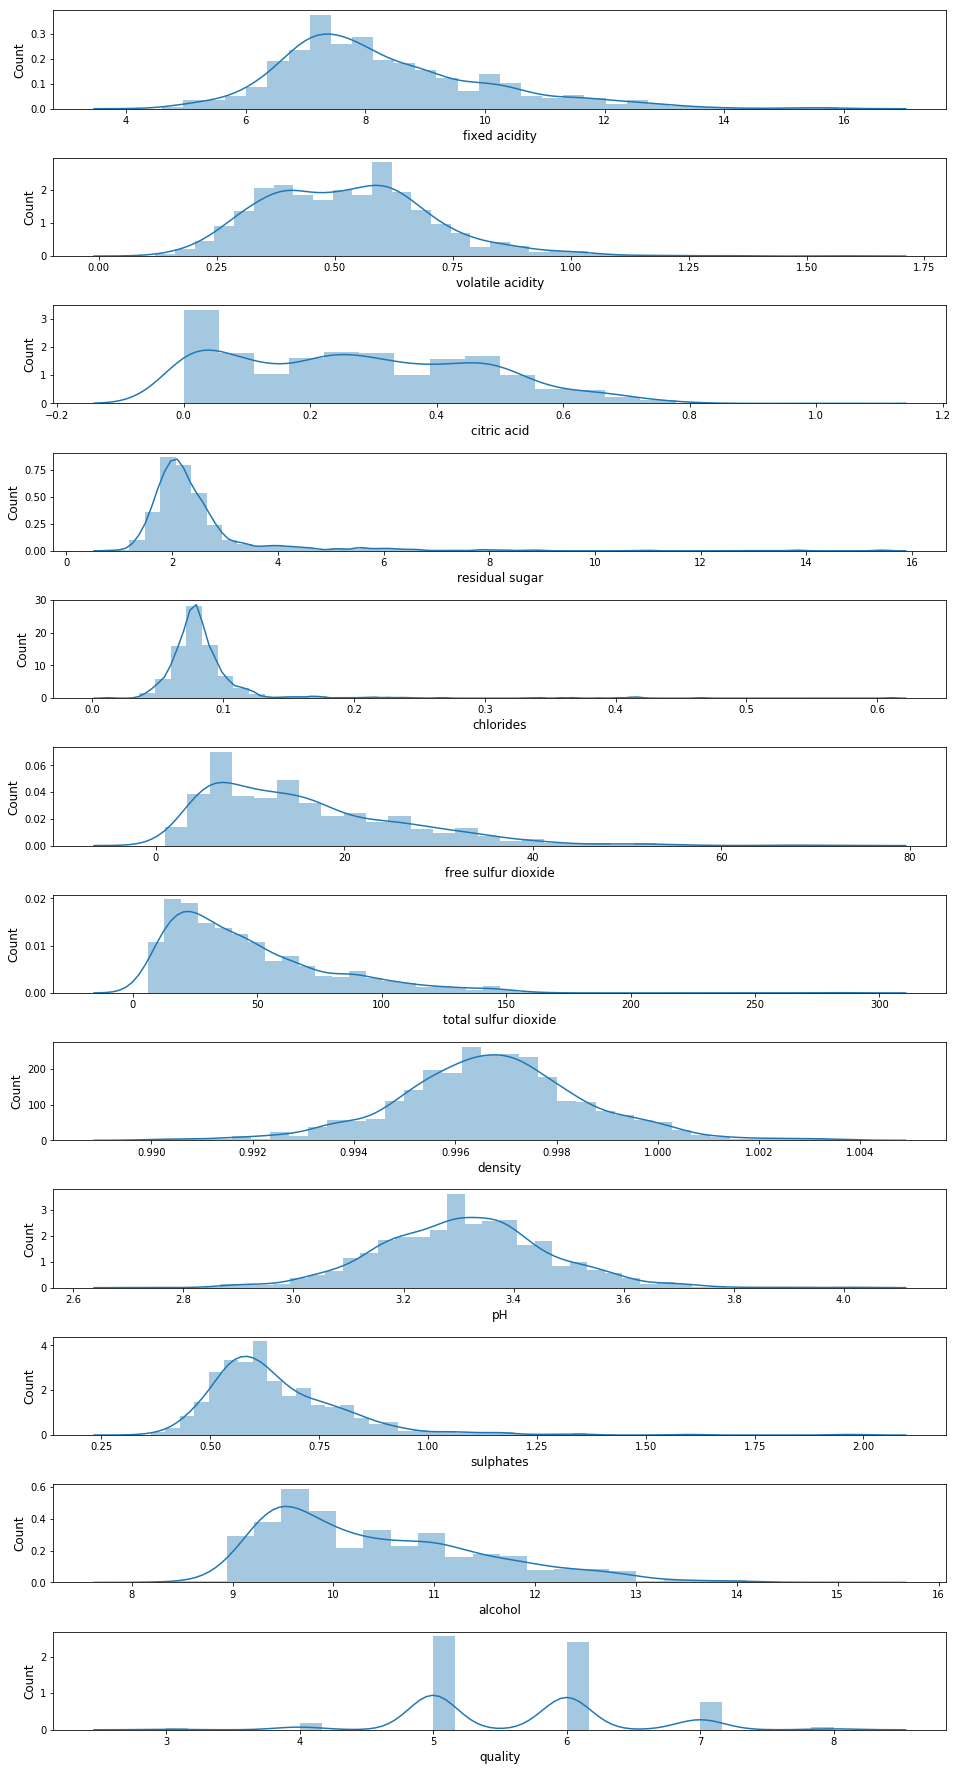

In [44]:
# check for skewness
col_names = df.columns

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)

plt.subplots_adjust(bottom = 0.01, top = 2, hspace = 0.5 )
plt.show()

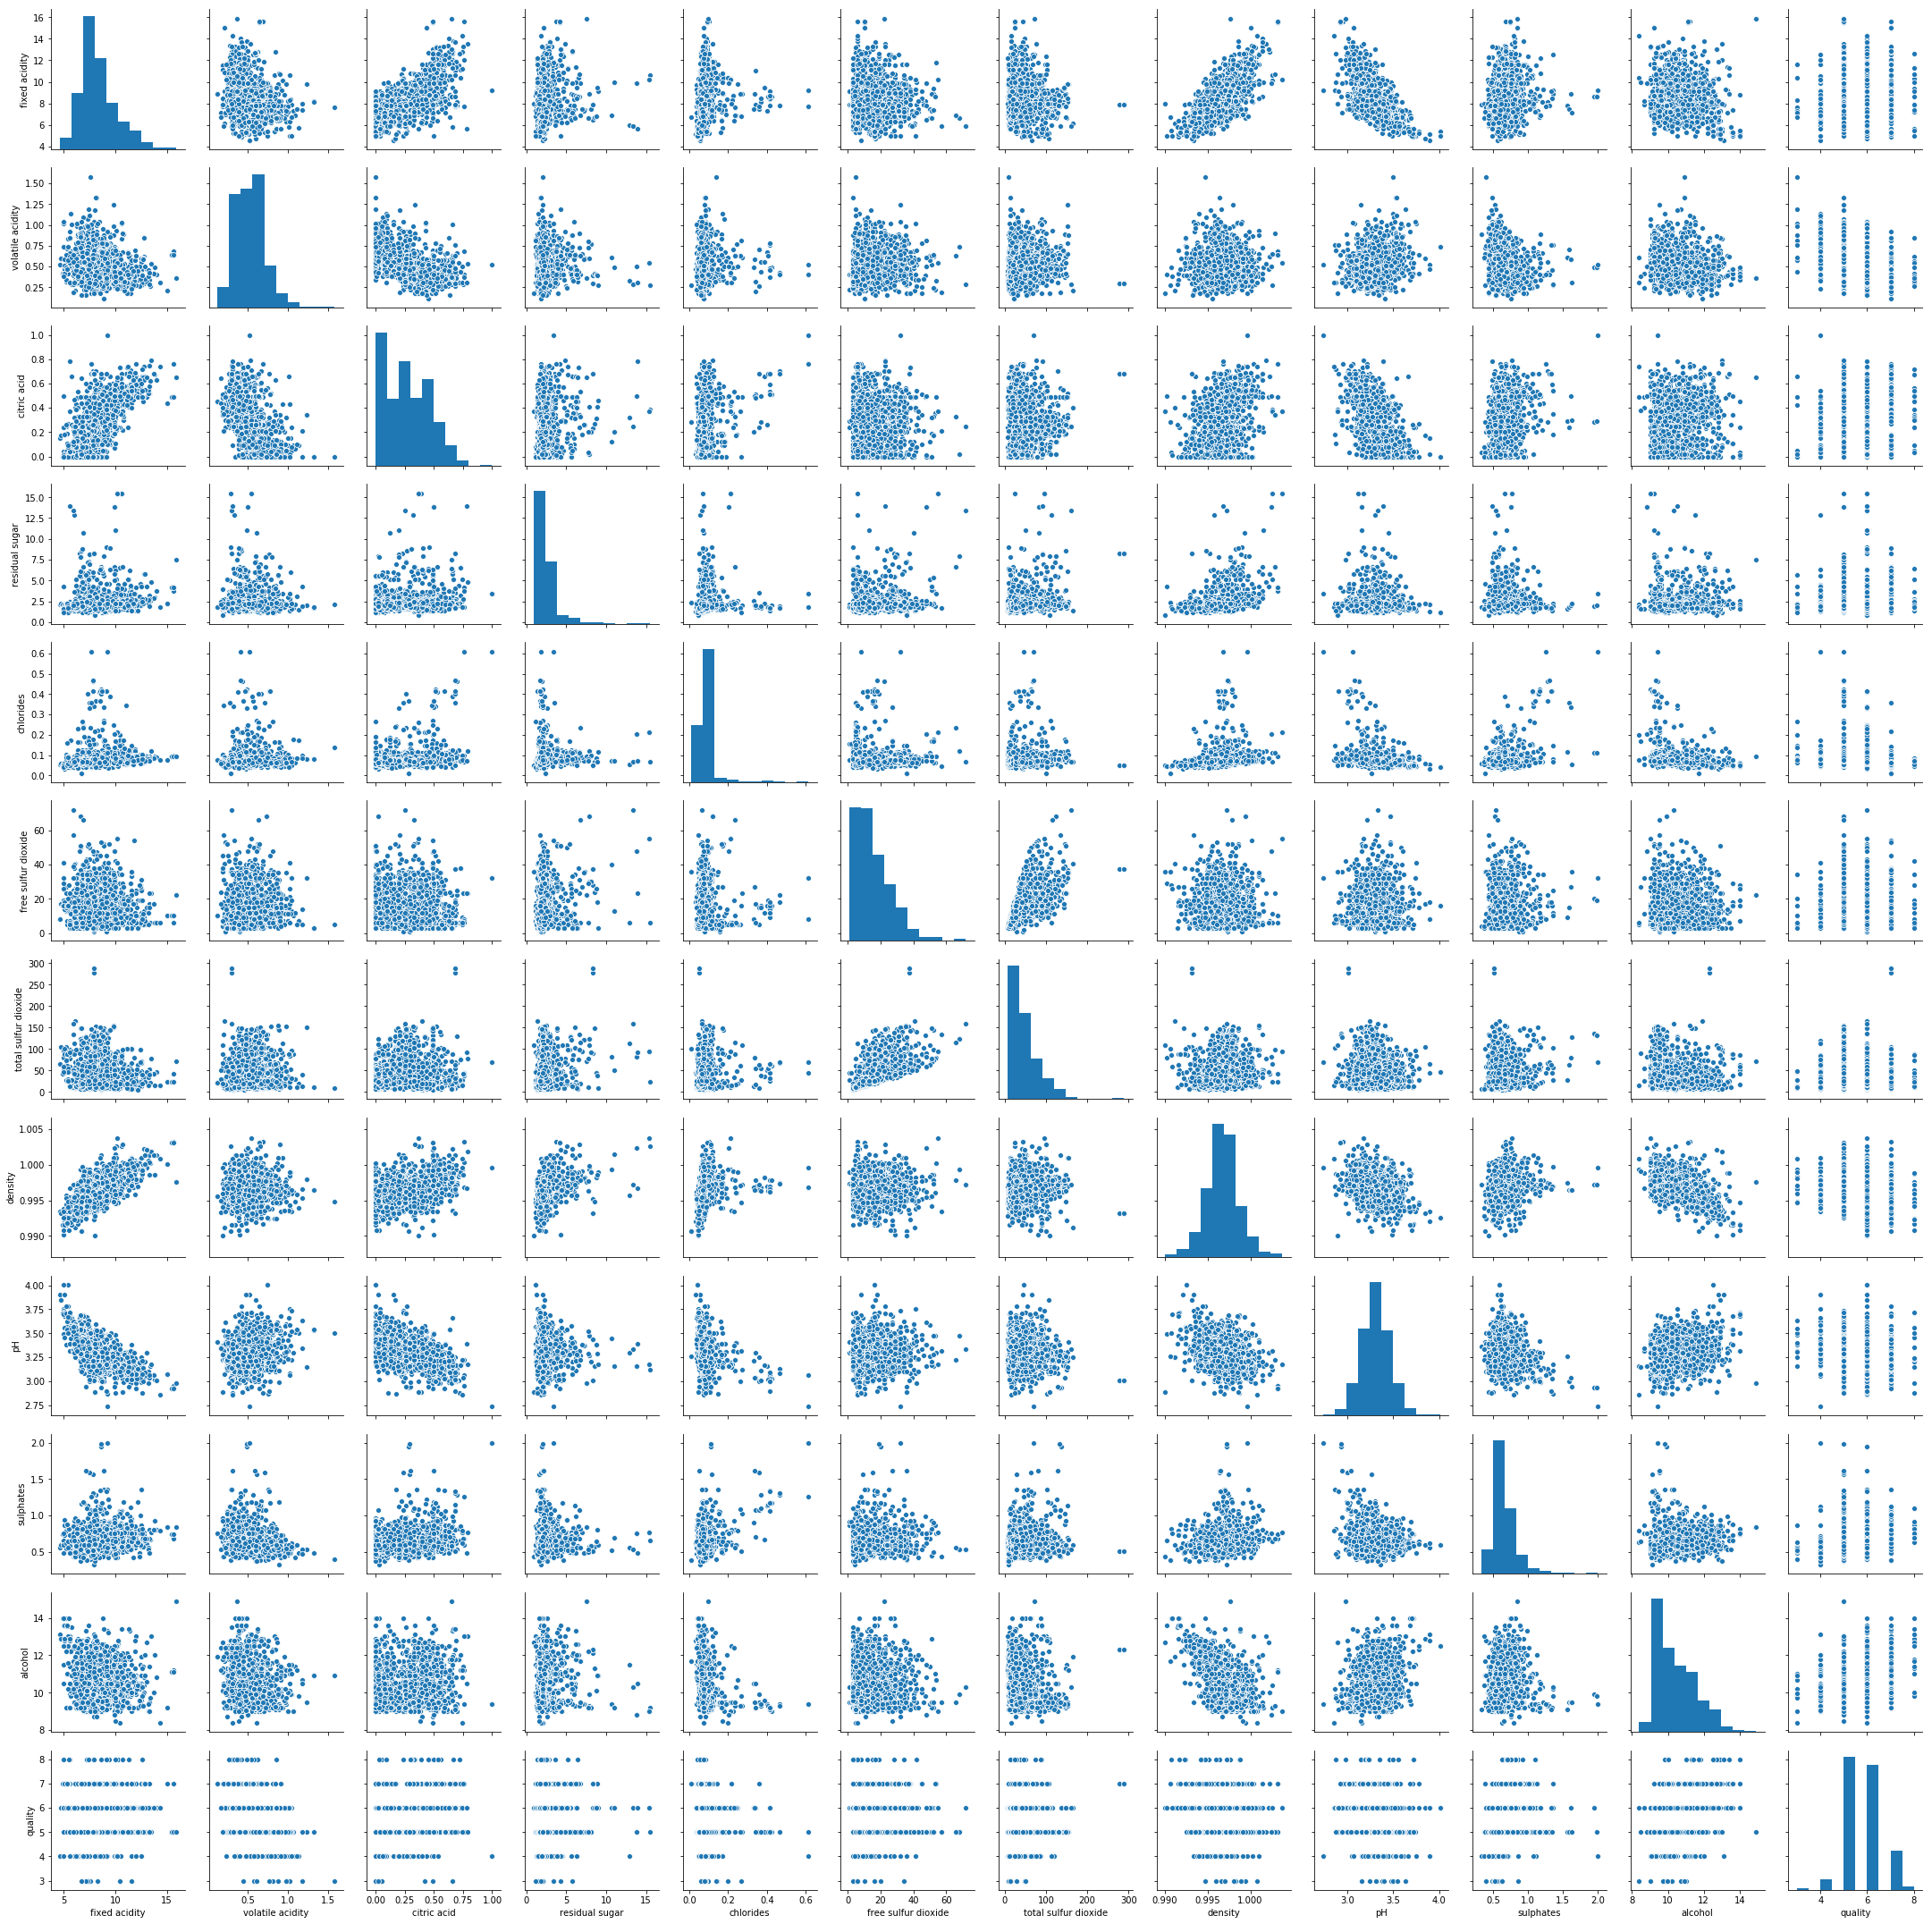

In [46]:
#relationship between two variables
sns.pairplot(df);

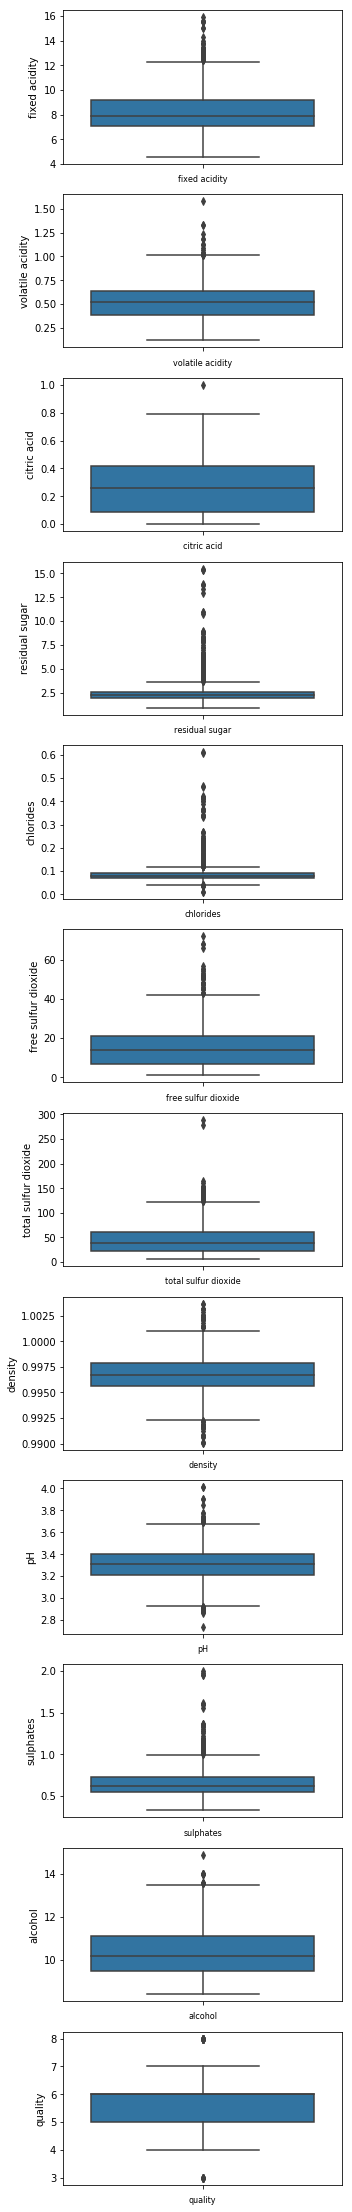

In [60]:
#outlier detection 
col_names = df.columns

fig, ax = plt.subplots(len(col_names), figsize=(5,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=8)


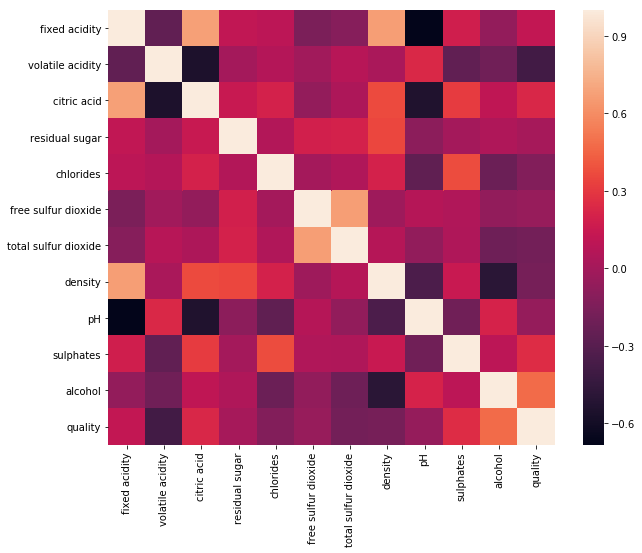

In [61]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

AttributeError: 'function' object has no attribute 'ravel'

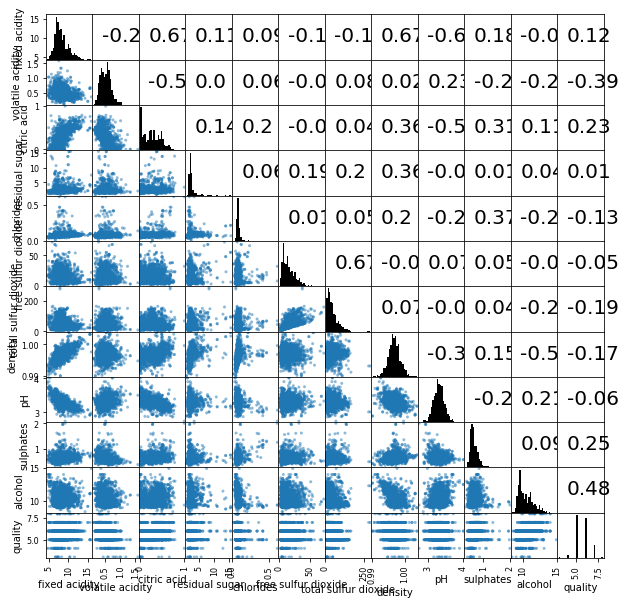

In [70]:
%matplotlib inline
from pandas.plotting import scatter_matrix
labs = df.columns
axarr = scatter_matrix(df[labs],figsize=(10,10),hist_kwds={'bins':30,'color':'black'}) # create scatter plots and histograms

# the plots in the upper-right corner are repetitive, so replace this with correlations for quicker analysis
for i,axlist in enumerate(axarr):
    for j,ax in enumerate(axlist):
        if i<j:
            ax.cla() # clears an Axes object
            ax.text(x=0.8*ax.get_xlim()[0]+0.2*ax.get_xlim()[1],y=0.6*ax.get_ylim()[0]+0.4*ax.get_ylim()[1],
                    s=np.round(np.corrcoef(df[labs[i]],df[labs[j]])[0,1],2),fontsize=20) # adds text to an Axes object
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)

In [69]:
scatter_matrix = scatter_matrix(
    df,
    figsize  = [15, 15],
    marker   = ".",
    s        = 0.2,
    diagonal = "kde"
)


TypeError: 'numpy.ndarray' object is not callable

In [45]:
X = df.iloc[:, :-1 ]
y = df.iloc[:,-1:]